**PROJECT DESCRIPTION**

Your client is a sports club chain with branches across Germany. They have given you access to 3 datasets: 

***customers* : A dataset consisting of individual customer information**

- *ID:* Unique customer identifier with the format birth year-random number eg. 1997-35
- *Contract_Start:* The month and year that the customer started their membership at the sports club 
- *Contract_End:* The month and year that the customer canceled their membership. If the value is n.a. then the customer still has an active membership 
- *Gender:* The gender of the customer 
- *Location:* The location of the branch at which the customer is a member 
- *Income_Level:* A factor representing the income level of the customer where 1 = highest income and 5 = lowest income
- *PT:* A free service the club offers in which the customer can get a consultation from a personal trainer and get a personalised training plan 
- *Usual_Visit_Time:* The usual time that the customer goes to the club
  
***visits* : Historical data of the number of visits per customer per week**

- *CustomerID*: A unique identifier that corresponds to the randomized number of the ID column in the customers dataset 
- *year-week*: The year and calendar week recorded 
- *Visits*: The number of unique visits during the equivalent year and week

***prices* : The prices i**


For the purpose of this analysis, assume the current year is 2019. 

The client is interested in obtaining some actionable insights from the data, with a key focus on the main drivers of customer churn (ie. membership cancellation). You are expected to answer the following questions: 

**QUESTION 1**

Complete an Exploratory Data Analysis and produce visualizations to explore the relationships between different variables and also use statistics to prove your insights as fact. Then answer the following questions: 

- Which factors influence whether a member is going to cancel their membership?
    
- How effective is the company's PT service? Does the impact of the PT service differ among different customer segments? 

**QUESTION 2**

Create a model to predict customer churn. Use the following questions to guide you:

- Do you need to perform any feature engineering before proceeding? 
  
- Do you need to include all variables in the model? Which are the most important ones? 
  
- What kind of Machine Learning algorithm should you use? 
  
- Which evaluation metric will you use to assess model performance? How reliable are your results?
- Mandatory evaluation metrics are:
  1. F1-Score
  2. Precision
  3. Recall

***
  

## Import Libraries

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load customers.csv

In [67]:
# Load customers dataset
customers_df = pd.read_csv("customers.csv", delimiter=";")

In [77]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,1993-199842
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,1980-85660
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,1,1973-147412
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,1969-49802
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,1981-68602


### Preprocessing

In [20]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        200000 non-null  int64 
 1   ID                200000 non-null  object
 2   Contract_Start    200000 non-null  object
 3   Contract_End      200000 non-null  object
 4   Gender            200000 non-null  object
 5   Location          200000 non-null  object
 6   PT                200000 non-null  object
 7   Usual_Visit_Time  199059 non-null  object
 8   Income Level      200000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 13.7+ MB


In [19]:
null_values_customers = customers_df.isnull().sum()
print("Null values in customers_df:")
print(null_values_customers)

Null values in customers_df:
Unnamed: 0            0
ID                    0
Contract_Start        0
Contract_End          0
Gender                0
Location              0
PT                    0
Usual_Visit_Time    941
Income Level          0
dtype: int64


**Imputing Null Values in Usual_Visit_Time using Standard Deviation Mode**

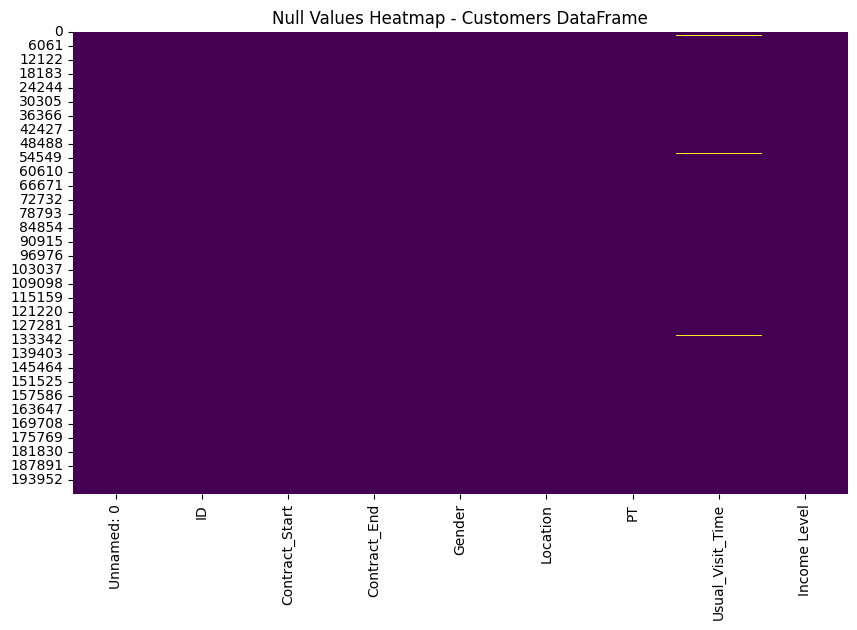

In [22]:
# Create a heatmap for null values in customers_df
plt.figure(figsize=(10, 6))
sns.heatmap(customers_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap - Customers DataFrame')
plt.show()

In [25]:
# Function to convert time strings to minutes
def time_to_minutes(time_str):
    if pd.isnull(time_str):
        return np.nan
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours * 60 + minutes + seconds / 60

# Convert Usual_Visit_Time to minutes
customers_df['Usual_Visit_Time'] = customers_df['Usual_Visit_Time'].apply(time_to_minutes)

# Calculate mean and standard deviation of non-null values in Usual_Visit_Time
mean_visit_time = customers_df['Usual_Visit_Time'].dropna().mean()
std_visit_time = customers_df['Usual_Visit_Time'].dropna().std()

# Generate random values from normal distribution
random_values = np.random.normal(mean_visit_time, std_visit_time, size=customers_df['Usual_Visit_Time'].isnull().sum())

# Impute NaN values with random values
customers_df.loc[customers_df['Usual_Visit_Time'].isnull(), 'Usual_Visit_Time'] = random_values

# Convert the time back to string format
customers_df['Usual_Visit_Time'] = customers_df['Usual_Visit_Time'].apply(lambda x: '%02d:%02d:00' % (int(x / 60), x % 60))

# Check if any NaN values remain
print("Null values in Usual_Visit_Time after imputation:", customers_df['Usual_Visit_Time'].isnull().sum())

Null values in Usual_Visit_Time after imputation: 0


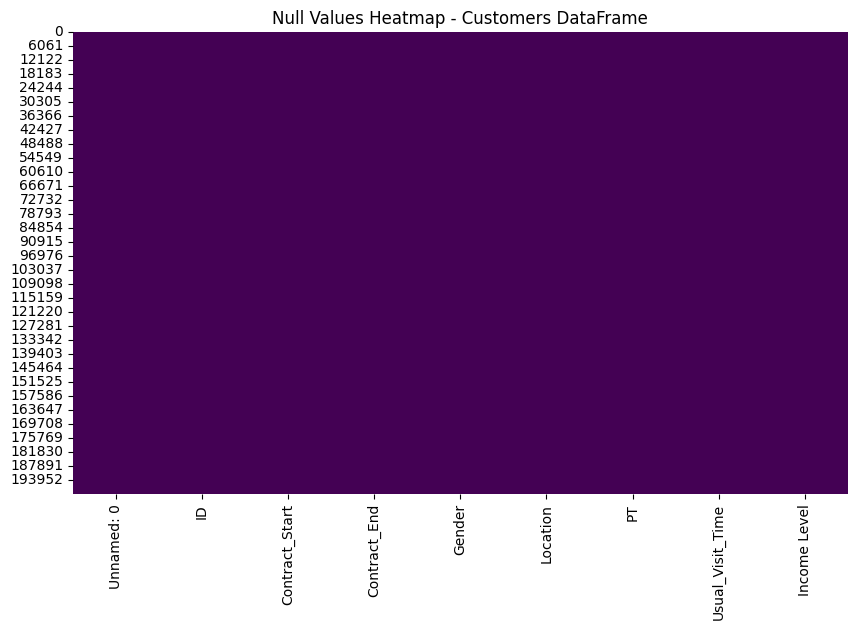

In [27]:
# Create a heatmap for null values in customers_df
plt.figure(figsize=(10, 6))
sns.heatmap(customers_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap - Customers DataFrame')
plt.show()

In [4]:
customers_df.dtypes

Unnamed: 0           int64
ID                  object
Contract_Start      object
Contract_End        object
Gender              object
Location            object
PT                  object
Usual_Visit_Time    object
Income Level         int64
dtype: object

In [5]:
customers_df.describe()

,Unnamed: 0,Income Level
count,200000.000000,200000.000000
mean,100000.500000,3.635105
std,57735.171256,0.933981
min,1.000000,1.000000
25%,50000.750000,3.000000
50%,100000.500000,4.000000
75%,150000.250000,4.000000
max,200000.000000,5.000000


In [28]:
customers_df.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
customers_df.dtypes

ID                  object
Contract_Start      object
Contract_End        object
Gender              object
Location            object
PT                  object
Usual_Visit_Time    object
Income Level         int64
dtype: object

In [30]:
customers_df.head()

,ID,Contract_Start,Contract_End,Gender,Location,PT,Usual_Visit_Time,Income Level
0,1993-199842,Nov-15,Apr-16,Female,Karlsruhe,no,17:15:00,3
1,1980-85660,Apr-14,Jul-14,Female,Nuremberg,yes,18:15:00,3
2,1973-147412,May-15,May-15,Male,Berlin,yes,09:36:00,4
3,1969-49802,Jun-18,Sep-18,Female,Braunschweig,no,06:45:00,5
4,1981-68602,Apr-13,Jul-13,Female,Hamburg,no,19:00:00,5


**Splitting ID and Birth Year from Column ID**

In [78]:
# Splitting the 'ID' column into 'Date_of_Birth' and 'ID' columns
customers_df[['Date_of_Birth', 'ID']] = customers_df['ID'].str.split('-', expand=True)

# Convert 'Date_of_Birth' column to datetime format
customers_df['Date_of_Birth'] = pd.to_datetime(customers_df['Date_of_Birth'])

In [79]:
# Calculate age based on birth year
customers_df['Age'] = 2024 - customers_df['Date_of_Birth'].dt.year

In [80]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,Date_of_Birth
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,1993-01-01
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,1980-01-01
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,1,147412,1973-01-01
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,1969-01-01
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,1981-01-01


In [84]:
customers_df= customers_df.drop('Date_of_Birth', axis=1)

In [35]:
# # Extracting only the year from the 'Date_of_Birth' column
# customers_df['Date_of_Birth'] = customers_df['Date_of_Birth'].dt.year

# # Renaming the column to 'Birth_Year'
# customers_df.rename(columns={'Date_of_Birth': 'Birth_Year'}, inplace=True)

In [85]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,1,147412
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602


In [38]:
customers_df.head()

,Contract_Start,Contract_End,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age
0,Nov-15,Apr-16,Female,Karlsruhe,no,17:15:00,3,1993,31
1,Apr-14,Jul-14,Female,Nuremberg,yes,18:15:00,3,1980,44
2,May-15,May-15,Male,Berlin,yes,09:36:00,4,1973,51
3,Jun-18,Sep-18,Female,Braunschweig,no,06:45:00,5,1969,55
4,Apr-13,Jul-13,Female,Hamburg,no,19:00:00,5,1981,43


**Encoding Gender Column**

In [39]:
# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column
customers_df['Gender'] = customers_df['Gender'].replace({'Male': 0, 'Female': 1})

In [40]:
customers_df.head()

,Contract_Start,Contract_End,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age
0,Nov-15,Apr-16,1,Karlsruhe,no,17:15:00,3,1993,31
1,Apr-14,Jul-14,1,Nuremberg,yes,18:15:00,3,1980,44
2,May-15,May-15,0,Berlin,yes,09:36:00,4,1973,51
3,Jun-18,Sep-18,1,Braunschweig,no,06:45:00,5,1969,55
4,Apr-13,Jul-13,1,Hamburg,no,19:00:00,5,1981,43


In [41]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Contract_Start    200000 non-null  object
 1   Contract_End      200000 non-null  object
 2   Gender            200000 non-null  int64 
 3   Location          200000 non-null  object
 4   PT                200000 non-null  object
 5   Usual_Visit_Time  200000 non-null  object
 6   Income Level      200000 non-null  int64 
 7   Birth_Year        200000 non-null  int64 
 8   Age               200000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 13.7+ MB


**Encoding Contract_Start and Contract_End Columns**

In [43]:
# Extract month from 'Contract_Start' and 'Contract_End' columns
customers_df['Contract_Start_Month'] = customers_df['Contract_Start'].apply(lambda x: x.split('-')[0])
customers_df['Contract_End_Month'] = customers_df['Contract_End'].apply(lambda x: x.split('-')[0])

# Define a dictionary to map month names to numeric values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Map month names to numeric values
customers_df['Contract_Start_Month'] = customers_df['Contract_Start_Month'].map(month_map)
customers_df['Contract_End_Month'] = customers_df['Contract_End_Month'].map(month_map)

In [44]:
customers_df.head()

,Contract_Start,Contract_End,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month
0,Nov-15,Apr-16,1,Karlsruhe,no,17:15:00,3,1993,31,11,4.0
1,Apr-14,Jul-14,1,Nuremberg,yes,18:15:00,3,1980,44,4,7.0
2,May-15,May-15,0,Berlin,yes,09:36:00,4,1973,51,5,5.0
3,Jun-18,Sep-18,1,Braunschweig,no,06:45:00,5,1969,55,6,9.0
4,Apr-13,Jul-13,1,Hamburg,no,19:00:00,5,1981,43,4,7.0


In [46]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contract_Start        200000 non-null  object 
 1   Contract_End          200000 non-null  object 
 2   Gender                200000 non-null  int64  
 3   Location              200000 non-null  object 
 4   PT                    200000 non-null  object 
 5   Usual_Visit_Time      200000 non-null  object 
 6   Income Level          200000 non-null  int64  
 7   Birth_Year            200000 non-null  int64  
 8   Age                   200000 non-null  int64  
 9   Contract_Start_Month  200000 non-null  int64  
 10  Contract_End_Month    187648 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 16.8+ MB


**'n.a'** shows Not churn

In [68]:
# Extract month from 'Contract_End' column
customers_df['Contract_End_Month'] = customers_df['Contract_End'].apply(lambda x: x.split('-')[0])

# Define a dictionary to map month names to numeric values
month_map = {'n.a':0 ,'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Map month names to numeric values
customers_df['Contract_End_Month'] = customers_df['Contract_End_Month'].map(month_map)

# Drop the original 'Contract_End' column
customers_df.drop(columns=['Contract_End'], inplace=True)

# Convert 'Contract_End_Month' column to integer type
customers_df['Contract_End_Month'] = customers_df['Contract_End_Month'].astype('Int64')

In [69]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7


In [70]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Contract_Start        200000 non-null  object
 1   Gender                200000 non-null  int64 
 2   Location              200000 non-null  object
 3   PT                    200000 non-null  int64 
 4   Usual_Visit_Time      200000 non-null  object
 5   Income Level          200000 non-null  int64 
 6   Birth_Year            200000 non-null  int64 
 7   Age                   200000 non-null  int64 
 8   Contract_Start_Month  200000 non-null  int64 
 9   Contract_End_Month    200000 non-null  Int64 
dtypes: Int64(1), int64(6), object(3)
memory usage: 15.4+ MB


**Splitting Month from Contract End**

In [53]:
# Extract month information from 'Contract_End' column and create 'Contract_End_Month' column
customers_df['Contract_End_Month'] = customers_df['Contract_End'].str.split('-').str[0]

In [54]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Contract_End
0,Nov-15,1,Karlsruhe,no,17:15:00,3,1993,31,11,Apr,Apr-16
1,Apr-14,1,Nuremberg,yes,18:15:00,3,1980,44,4,Jul,Jul-14
2,May-15,0,Berlin,yes,09:36:00,4,1973,51,5,May,May-15
3,Jun-18,1,Braunschweig,no,06:45:00,5,1969,55,6,Sep,Sep-18
4,Apr-13,1,Hamburg,no,19:00:00,5,1981,43,4,Jul,Jul-13


In [71]:
unique_contract_end_month = customers_df['Contract_End_Month'].unique()
unique_contract_end_month

<IntegerArray>
[4, 7, 5, 9, 3, 11, 6, 0, 1, 12, 10, 8, 2]
Length: 13, dtype: Int64

In [73]:
# Count the number of 'n.a' values in 'Contract_End_Month' column
na_count = (customers_df['Contract_End_Month'] == 0).sum()

# Display the count
print("Number of 'n.a' values in Contract_End_Month:", na_count)


Number of 'n.a' values in Contract_End_Month: 12352


In [74]:
# Assuming 'customers_df' is your DataFrame containing customer data
customers_df['Churned'] = customers_df['Contract_End_Month'].apply(lambda x: 0 if x == 0 else 1)


In [57]:
# Calculate the mode of non-'n.a' values in 'Contract_End_Month' column
mode_contract_end_month = customers_df[customers_df['Contract_End_Month'] != 'n.a']['Contract_End_Month'].mode()[0]

# Impute 'n.a' values with mode
customers_df['Contract_End_Month'] = customers_df['Contract_End_Month'].replace('n.a', mode_contract_end_month)

# Display unique values after imputation
print(customers_df['Contract_End_Month'].unique())


['Apr' 'Jul' 'May' 'Sep' 'Mar' 'Nov' 'Jun' 'Dec' 'Jan' 'Oct' 'Aug' 'Feb']


In [58]:
# Define a dictionary to map month abbreviations to integers
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Map month abbreviations to integers
customers_df['Contract_End_Month'] = customers_df['Contract_End_Month'].map(month_mapping)

# Display unique values after mapping
print(customers_df['Contract_End_Month'].unique())

[ 4  7  5  9  3 11  6 12  1 10  8  2]


In [59]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Contract_End
0,Nov-15,1,Karlsruhe,no,17:15:00,3,1993,31,11,4,Apr-16
1,Apr-14,1,Nuremberg,yes,18:15:00,3,1980,44,4,7,Jul-14
2,May-15,0,Berlin,yes,09:36:00,4,1973,51,5,5,May-15
3,Jun-18,1,Braunschweig,no,06:45:00,5,1969,55,6,9,Sep-18
4,Apr-13,1,Hamburg,no,19:00:00,5,1981,43,4,7,Jul-13


In [60]:
unique_PT = customers_df['PT'].unique()
unique_PT

array(['no', 'yes'], dtype=object)

**Encoding PT service**

In [61]:
# Map 'no' to 0 and 'yes' to 1 in the 'PT' column
customers_df['PT'] = customers_df['PT'].replace({'no': 0, 'yes': 1})

In [62]:
customers_df.head()

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Contract_End
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,Apr-16
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,Jul-14
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,May-15
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,Sep-18
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,Jul-13


In [63]:
unique_location = customers_df['Location'].unique()
unique_location

array(['Karlsruhe', 'Nuremberg', 'Berlin', 'Braunschweig', 'Hamburg',
       'Bielefeld', 'Magdeburg', 'Duisburg', 'Essen', 'Mönchengladbach',
       'Frankfurt', 'Düsseldorf', 'Dresden', 'Augsburg', 'Leipzig',
       'Hanover', 'Bremen', 'Kiel', 'Chemnitz', 'Bonn', 'Bochum',
       'Cologne', 'Stuttgart', 'Halle', 'Dortmund', 'Wuppertal', 'Munich',
       'Wiesbaden', 'Gelsenkirchen', 'Mannheim', 'Münster', 'Aachen'],
      dtype=object)

In [65]:
location_counts = customers_df['Location'].value_counts()
location_counts

Berlin             11604
Hamburg            11433
Munich             10113
Cologne            10082
Frankfurt           9710
Stuttgart           9185
Düsseldorf          9183
Dortmund            8872
Essen               8587
Leipzig             8440
Bremen              7267
Dresden             7117
Hanover             6994
Nuremberg           6822
Duisburg            6604
Bochum              6430
Wuppertal           6390
Bielefeld           5555
Bonn                5354
Münster             5308
Karlsruhe           5254
Mannheim            4307
Augsburg            3992
Wiesbaden           3859
Gelsenkirchen       3852
Mönchengladbach     3623
Braunschweig        3425
Chemnitz            3138
Kiel                3072
Aachen              2141
Halle               1389
Magdeburg            898
Name: Location, dtype: int64

In [ ]:
## WE are not considering location for modelling purpose

In [89]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,1,147412
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199
199996,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365
199997,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122
199998,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944


In [90]:
unique_ids_count = customers_df['ID'].nunique()

In [91]:
unique_ids_count

200000

In [96]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Contract_Start        200000 non-null  object
 1   Gender                200000 non-null  int64 
 2   Location              200000 non-null  object
 3   PT                    200000 non-null  int64 
 4   Usual_Visit_Time      200000 non-null  object
 5   Income Level          200000 non-null  int64 
 6   Birth_Year            200000 non-null  int64 
 7   Age                   200000 non-null  int64 
 8   Contract_Start_Month  200000 non-null  int64 
 9   Contract_End_Month    200000 non-null  Int64 
 10  Churned               200000 non-null  int64 
 11  ID                    200000 non-null  object
dtypes: Int64(1), int64(7), object(4)
memory usage: 18.5+ MB


In [99]:
# Convert 'ID' column to float and then to int
customers_df['ID'] = customers_df['ID'].astype(float).astype(int)

# Verify the changes
customers_df['ID'].dtype

dtype('int32')

## Loading visits.csv

In [6]:
# Load visits dataset
visits_df = pd.read_csv("visits.csv")

In [7]:
visits_df.head()

,Unnamed: 0,CustomerID,year_week,Visits
0,1,1.0,2011 - 48,2
1,2,1.0,2011 - 49,4
2,3,1.0,2011 - 50,6
3,4,1.0,2011 - 51,5
4,5,1.0,2011 - 52,3


### Preprocessing

In [8]:
visits_df.dtypes

Unnamed: 0      int64
CustomerID    float64
year_week      object
Visits          int64
dtype: object

In [86]:
visits_df['CustomerID'] = visits_df['CustomerID'].astype(int)

In [88]:
visits_df

,Unnamed: 0,CustomerID,year_week,Visits
0,1,1,2011 - 48,2
1,2,1,2011 - 49,4
2,3,1,2011 - 50,6
3,4,1,2011 - 51,5
4,5,1,2011 - 52,3
...,...,...,...,...
4245505,4245506,200000,2014 - 49,1
4245506,4245507,200000,2014 - 50,3
4245507,4245508,200000,2014 - 51,3
4245508,4245509,200000,2014 - 52,1


In [87]:
visits_df.describe()

,Unnamed: 0,CustomerID,Visits
count,4.245510e+06,4.245510e+06,4.245510e+06
mean,2.122756e+06,1.000771e+05,3.852159e+00
std,1.225573e+06,5.765650e+04,1.763656e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.061378e+06,5.028700e+04,2.000000e+00
50%,2.122756e+06,1.000970e+05,4.000000e+00
75%,3.184133e+06,1.499940e+05,5.000000e+00
max,4.245510e+06,2.000000e+05,7.000000e+00


In [92]:
visits_df = visits_df.drop('Unnamed: 0', axis=1)

In [93]:
null_values_visits = visits_df.isnull().sum()
print("Null values in visits_df:")
print(null_values_visits)

Null values in visits_df:
CustomerID    0
year_week     0
Visits        0
dtype: int64


In [94]:
## Good to go for mapping!!!!!!!

Here total visits of a specific users are summed up and mapped to unique ID in customers.df

In [100]:
# Aggregate visit data by CustomerID to get total visits per customer
total_visits = visits_df.groupby('CustomerID').agg(total_visits=('Visits', 'sum')).reset_index()

# Merge with customers_df
customers_df = customers_df.merge(total_visits, left_on='ID', right_on='CustomerID', how='left')

In [101]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,CustomerID,total_visits
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,199842.0,96.0
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,85660.0,78.0
2,May-15,0,Berlin,1,09:36:00,4,1973,51,5,5,1,147412,NaN,NaN
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,49802.0,56.0
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,68602.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,8199.0,94.0
199996,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,5365.0,16.0
199997,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,26122.0,25.0
199998,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,55944.0,95.0


In [102]:
# Count the number of NaN values in the 'CustomerID' column
nan_count = customers_df['CustomerID'].isna().sum()

# Print the count of NaN values
print("Number of NaN values in 'CustomerID':", nan_count)


Number of NaN values in 'CustomerID': 941


In [105]:
# Drop rows where 'CustomerID' is NaN
customers_df.dropna(subset=['CustomerID'], inplace=True)

In [106]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,CustomerID,total_visits,Contract_End
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,199842.0,96.0,Apr-16
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,85660.0,78.0,Jul-14
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,49802.0,56.0,Sep-18
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,68602.0,89.0,Jul-13
5,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,1,4924,4924.0,29.0,Mar-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,8199.0,94.0,Nov-12
199996,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,5365.0,16.0,Oct-09
199997,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,26122.0,25.0,Dec-14
199998,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,55944.0,95.0,Jun-15


In [107]:
customers_df = customers_df.drop('CustomerID',axis=1)

In [121]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199059 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contract_Start        199059 non-null  object 
 1   Gender                199059 non-null  int64  
 2   Location              199059 non-null  object 
 3   PT                    199059 non-null  int64  
 4   Usual_Visit_Time      199059 non-null  object 
 5   Income Level          199059 non-null  int64  
 6   Birth_Year            199059 non-null  int64  
 7   Age                   199059 non-null  int64  
 8   Contract_Start_Month  199059 non-null  int64  
 9   Contract_End_Month    199059 non-null  Int64  
 10  Churned               199059 non-null  int64  
 11  ID                    199059 non-null  int32  
 12  total_visits          199059 non-null  int32  
 13  Contract_End          186711 non-null  object 
 14  Contract_Start_Year   199059 non-null  int64  
 15  

In [110]:
customers_df['total_visits'] = customers_df['total_visits'].astype(int)

In [111]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,96,Apr-16
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,78,Jul-14
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,56,Sep-18
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,89,Jul-13
5,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,1,4924,29,Mar-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,94,Nov-12
199996,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,16,Oct-09
199997,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,25,Dec-14
199998,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,95,Jun-15


## Load prices.xlsx

In [12]:
!pip install openpyxl

   -------------------------------------- 250.0/250.0 kB 247.4 kB/s eta 0:00:00


In [13]:
# Load prices dataset
prices_df = pd.read_excel("prices.xlsx")

In [14]:
prices_df.head()

,Year,Price
0,2009,30.99
1,2010,30.99
2,2011,30.99
3,2012,30.99
4,2013,30.99


### Preprocessing

In [15]:
prices_df.dtypes

Year       int64
Price    float64
dtype: object

In [16]:
prices_df.describe()

,Year,Price
count,10.00000,10.000000
mean,2013.50000,32.790000
std,3.02765,2.898275
min,2009.00000,30.990000
25%,2011.25000,30.990000
50%,2013.50000,30.990000
75%,2015.75000,35.490000
max,2018.00000,36.990000


In [113]:
# Replace 'n.a' values in Contract_End with NaN
customers_df['Contract_End'] = customers_df['Contract_End'].replace('n.a', np.nan)

# Extract year from Contract_Start and Contract_End in customers_df
customers_df['Contract_Start_Year'] = pd.to_datetime(customers_df['Contract_Start'], format='%b-%y').dt.year
customers_df['Contract_End_Year'] = pd.to_datetime(customers_df['Contract_End'], format='%b-%y').dt.year

In [114]:
customers_df['Contract_Start_Year'] = pd.to_datetime(customers_df['Contract_Start'], format='%b-%y').dt.year
customers_df['Contract_End_Year'] = pd.to_datetime(customers_df['Contract_End'], format='%b-%y').dt.year

In [123]:
# Convert Contract_End_Year float values to int, keeping NaN values unchanged
customers_df['Contract_End_Year'] = customers_df['Contract_End_Year'].fillna(-1).astype(int)

# Verify the data type and unique values again
print(customers_df['Contract_End_Year'].dtype)
print(customers_df['Contract_End_Year'].unique())


int32
[2016 2014 2018 2013 2010   -1 2015 2012 2017 2009 2011]


In [124]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,96,Apr-16,2015,2016
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,78,Jul-14,2014,2014
3,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,56,Sep-18,2018,2018
4,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,89,Jul-13,2013,2013
5,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,1,4924,29,Mar-16,2015,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,94,Nov-12,2012,2012
199996,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,16,Oct-09,2009,2009
199997,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,25,Dec-14,2014,2014
199998,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,95,Jun-15,2014,2015


In [134]:
# Merge start year prices
customers_df = customers_df.merge(prices_df, left_on='Contract_Start_Year', right_on='Year', how='left')
# Merge end year prices if needed, handling -1 values
customers_df = customers_df.merge(prices_df, left_on=['Contract_End_Year', 'Contract_End_Year'], right_on=['Year', 'Year'], how='left')

# Replace NaN values in end year price columns with 0 if needed
customers_df['Price_end'] = customers_df['Price_end'].fillna(0)


**Here Prices are mapped with Start and End of Contract**

In [135]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,...,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year,Year_end,Price_end,Year_x,Price_x,Year_y,Price_y
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,...,96,Apr-16,2015,2016,2016.0,36.99,2015.0,30.99,2016.0,36.99
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,...,78,Jul-14,2014,2014,2014.0,30.99,2014.0,30.99,2014.0,30.99
2,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,...,56,Sep-18,2018,2018,2018.0,36.99,2018.0,36.99,2018.0,36.99
3,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,...,89,Jul-13,2013,2013,2013.0,30.99,2013.0,30.99,2013.0,30.99
4,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,...,29,Mar-16,2015,2016,2016.0,36.99,2015.0,30.99,2016.0,36.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199054,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,...,94,Nov-12,2012,2012,2012.0,30.99,2012.0,30.99,2012.0,30.99
199055,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,...,16,Oct-09,2009,2009,2009.0,30.99,2009.0,30.99,2009.0,30.99
199056,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,...,25,Dec-14,2014,2014,2014.0,30.99,2014.0,30.99,2014.0,30.99
199057,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,...,95,Jun-15,2014,2015,2015.0,30.99,2014.0,30.99,2015.0,30.99


In [139]:
#customers_df = customers_df.drop(['Year_x', 'Year_y', 'Price_y'], axis=1)
customers_df = customers_df.drop('Year_end', axis=1)

In [141]:
customers_df = customers_df.rename(columns={'Price_x': 'Price_start'})

In [142]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199059 entries, 0 to 199058
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contract_Start        199059 non-null  object 
 1   Gender                199059 non-null  int64  
 2   Location              199059 non-null  object 
 3   PT                    199059 non-null  int64  
 4   Usual_Visit_Time      199059 non-null  object 
 5   Income Level          199059 non-null  int64  
 6   Birth_Year            199059 non-null  int64  
 7   Age                   199059 non-null  int64  
 8   Contract_Start_Month  199059 non-null  int64  
 9   Contract_End_Month    199059 non-null  Int64  
 10  Churned               199059 non-null  int64  
 11  ID                    199059 non-null  int32  
 12  total_visits          199059 non-null  int32  
 13  Contract_End          186711 non-null  object 
 14  Contract_Start_Year   199059 non-null  int64  
 15  

In [143]:
# Check for missing values in 'Price_start' column
missing_price_start = customers_df['Price_start'].isnull().sum()
print("Missing values in 'Price_start' column:", missing_price_start)

# Check for missing values in 'Price_end' column
missing_price_end = customers_df['Price_end'].isnull().sum()
print("Missing values in 'Price_end' column:", missing_price_end)


Missing values in 'Price_start' column: 5
Missing values in 'Price_end' column: 0


In [146]:
# Find rows with missing values in 'Price_start' column
missing_price_start_rows = customers_df[customers_df['Price_start'].isnull()]
print("Rows with missing values in 'Price_start' column:")
missing_price_start_rows


Rows with missing values in 'Price_start' column:


,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year,Price_end,Price_start
20546,Jan-31,1,Düsseldorf,1,07:15:00,4,1990,34,1,1,1,3000,21,Jan-13,2031,2013,30.99,NaN
58238,Jun-61,0,Stuttgart,0,17:45:00,4,1986,38,6,12,1,79,156,Dec-16,2061,2016,36.99,NaN
117581,Feb-71,1,Stuttgart,0,17:30:00,3,1981,43,2,4,1,500,54,Apr-17,1971,2017,36.99,NaN
163847,Mar-71,0,Berlin,0,15:15:00,4,1977,47,3,7,1,1500,72,Jul-17,1971,2017,36.99,NaN
196563,Jul-71,0,Wiesbaden,1,12:00:00,4,1984,40,7,2,1,19,126,Feb-18,1971,2018,36.99,NaN


In [147]:
# Define a dictionary mapping incorrect start years to correct years based on prices
year_correction = {
    2031: 2013, 
    2061: 2016, 
    1971: 2017,
}

# Update the Contract_Start_Year column with correct years
for incorrect_year, correct_year in year_correction.items():
    customers_df.loc[customers_df['Contract_Start_Year'] == incorrect_year, 'Contract_Start_Year'] = correct_year

In [148]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year,Price_end,Price_start
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,96,Apr-16,2015,2016,36.99,30.99
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,78,Jul-14,2014,2014,30.99,30.99
2,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,56,Sep-18,2018,2018,36.99,36.99
3,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,89,Jul-13,2013,2013,30.99,30.99
4,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,1,4924,29,Mar-16,2015,2016,36.99,30.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199054,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,94,Nov-12,2012,2012,30.99,30.99
199055,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,16,Oct-09,2009,2009,30.99,30.99
199056,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,25,Dec-14,2014,2014,30.99,30.99
199057,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,95,Jun-15,2014,2015,30.99,30.99


In [149]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199059 entries, 0 to 199058
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contract_Start        199059 non-null  object 
 1   Gender                199059 non-null  int64  
 2   Location              199059 non-null  object 
 3   PT                    199059 non-null  int64  
 4   Usual_Visit_Time      199059 non-null  object 
 5   Income Level          199059 non-null  int64  
 6   Birth_Year            199059 non-null  int64  
 7   Age                   199059 non-null  int64  
 8   Contract_Start_Month  199059 non-null  int64  
 9   Contract_End_Month    199059 non-null  Int64  
 10  Churned               199059 non-null  int64  
 11  ID                    199059 non-null  int32  
 12  total_visits          199059 non-null  int32  
 13  Contract_End          186711 non-null  object 
 14  Contract_Start_Year   199059 non-null  int64  
 15  

In [150]:
# Find rows with missing values in 'Price_start' column
missing_price_start_rows = customers_df[customers_df['Price_start'].isnull()]
print("Rows with missing values in 'Price_start' column:")
missing_price_start_rows


Rows with missing values in 'Price_start' column:


,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year,Price_end,Price_start
20546,Jan-31,1,Düsseldorf,1,07:15:00,4,1990,34,1,1,1,3000,21,Jan-13,2013,2013,30.99,NaN
58238,Jun-61,0,Stuttgart,0,17:45:00,4,1986,38,6,12,1,79,156,Dec-16,2016,2016,36.99,NaN
117581,Feb-71,1,Stuttgart,0,17:30:00,3,1981,43,2,4,1,500,54,Apr-17,2017,2017,36.99,NaN
163847,Mar-71,0,Berlin,0,15:15:00,4,1977,47,3,7,1,1500,72,Jul-17,2017,2017,36.99,NaN
196563,Jul-71,0,Wiesbaden,1,12:00:00,4,1984,40,7,2,1,19,126,Feb-18,2017,2018,36.99,NaN


In [151]:
# Define a dictionary mapping correct start years to their corresponding prices
start_year_prices = {
    2013: 30.99,
    2016: 36.99,
    2017: 36.99,
}

# Update the Price_start column with correct prices
for year, price in start_year_prices.items():
    customers_df.loc[customers_df['Contract_Start_Year'] == year, 'Price_start'] = price

In [152]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199059 entries, 0 to 199058
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Contract_Start        199059 non-null  object 
 1   Gender                199059 non-null  int64  
 2   Location              199059 non-null  object 
 3   PT                    199059 non-null  int64  
 4   Usual_Visit_Time      199059 non-null  object 
 5   Income Level          199059 non-null  int64  
 6   Birth_Year            199059 non-null  int64  
 7   Age                   199059 non-null  int64  
 8   Contract_Start_Month  199059 non-null  int64  
 9   Contract_End_Month    199059 non-null  Int64  
 10  Churned               199059 non-null  int64  
 11  ID                    199059 non-null  int32  
 12  total_visits          199059 non-null  int32  
 13  Contract_End          186711 non-null  object 
 14  Contract_Start_Year   199059 non-null  int64  
 15  

In [154]:
customers_df['Contract_End_Year'].unique()

array([2016, 2014, 2018, 2013, 2010,   -1, 2015, 2012, 2017, 2009, 2011])

In [155]:
customers_df

,Contract_Start,Gender,Location,PT,Usual_Visit_Time,Income Level,Birth_Year,Age,Contract_Start_Month,Contract_End_Month,Churned,ID,total_visits,Contract_End,Contract_Start_Year,Contract_End_Year,Price_end,Price_start
0,Nov-15,1,Karlsruhe,0,17:15:00,3,1993,31,11,4,1,199842,96,Apr-16,2015,2016,36.99,30.99
1,Apr-14,1,Nuremberg,1,18:15:00,3,1980,44,4,7,1,85660,78,Jul-14,2014,2014,30.99,30.99
2,Jun-18,1,Braunschweig,0,06:45:00,5,1969,55,6,9,1,49802,56,Sep-18,2018,2018,36.99,36.99
3,Apr-13,1,Hamburg,0,19:00:00,5,1981,43,4,7,1,68602,89,Jul-13,2013,2013,30.99,30.99
4,Dec-15,1,Bielefeld,0,18:15:00,2,1981,43,12,3,1,4924,29,Mar-16,2015,2016,36.99,30.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199054,Jun-12,0,Essen,0,16:30:00,3,1978,46,6,11,1,8199,94,Nov-12,2012,2012,30.99,30.99
199055,Oct-09,1,Cologne,1,12:00:00,5,1982,42,10,10,1,5365,16,Oct-09,2009,2009,30.99,30.99
199056,Oct-14,0,Dresden,0,07:00:00,5,1977,47,10,12,1,26122,25,Dec-14,2014,2014,30.99,30.99
199057,Nov-14,0,Hanover,0,20:15:00,3,1993,31,11,6,1,55944,95,Jun-15,2014,2015,30.99,30.99


In [160]:
# Define the desired column order
desired_columns = [
    'ID', 'Gender','Birth_Year', 'Age','Location','Income Level','Contract_Start', 'Contract_End','PT', 'Usual_Visit_Time', 
    'Contract_Start_Month', 
    'Contract_End_Month','Contract_Start_Year', 
    'Contract_End_Year', 'total_visits', 'Price_start','Price_end','Churned'
]

# Reorder the columns
customers_df = customers_df.reindex(columns=desired_columns)


In [161]:
customers_df

,ID,Gender,Birth_Year,Age,Location,Income Level,Contract_Start,Contract_End,PT,Usual_Visit_Time,Contract_Start_Month,Contract_End_Month,Contract_Start_Year,Contract_End_Year,total_visits,Price_start,Price_end,Churned
0,199842,1,1993,31,Karlsruhe,3,Nov-15,Apr-16,0,17:15:00,11,4,2015,2016,96,30.99,36.99,1
1,85660,1,1980,44,Nuremberg,3,Apr-14,Jul-14,1,18:15:00,4,7,2014,2014,78,30.99,30.99,1
2,49802,1,1969,55,Braunschweig,5,Jun-18,Sep-18,0,06:45:00,6,9,2018,2018,56,36.99,36.99,1
3,68602,1,1981,43,Hamburg,5,Apr-13,Jul-13,0,19:00:00,4,7,2013,2013,89,30.99,30.99,1
4,4924,1,1981,43,Bielefeld,2,Dec-15,Mar-16,0,18:15:00,12,3,2015,2016,29,30.99,36.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199054,8199,0,1978,46,Essen,3,Jun-12,Nov-12,0,16:30:00,6,11,2012,2012,94,30.99,30.99,1
199055,5365,1,1982,42,Cologne,5,Oct-09,Oct-09,1,12:00:00,10,10,2009,2009,16,30.99,30.99,1
199056,26122,0,1977,47,Dresden,5,Oct-14,Dec-14,0,07:00:00,10,12,2014,2014,25,30.99,30.99,1
199057,55944,0,1993,31,Hanover,3,Nov-14,Jun-15,0,20:15:00,11,6,2014,2015,95,30.99,30.99,1


## Question # 01 -Analysis

**Which factors influence whether a member is going to cancel their membership?**

**Summary statistics**

In [196]:
numerical_summary = customers_df.describe()

# Frequency tables for categorical variables
categorical_columns = ['Gender', 'Location', 'PT', 'Income Level', 'Churned']
categorical_frequency = {}
for col in categorical_columns:
    categorical_frequency[col] = customers_df[col].value_counts()

print("Summary Statistics for Numerical Variables:")
numerical_summary
print("\nFrequency Tables for Categorical Variables:")
for col, freq_table in categorical_frequency.items():
    print(f"\n{col}:\n{freq_table}")

Summary Statistics for Numerical Variables:

Frequency Tables for Categorical Variables:

Gender:
0    103394
1     95665
Name: Gender, dtype: int64

Location:
Berlin             11552
Hamburg            11383
Munich             10068
Cologne            10042
Frankfurt           9666
Düsseldorf          9152
Stuttgart           9147
Dortmund            8829
Essen               8543
Leipzig             8396
Bremen              7222
Dresden             7092
Hanover             6958
Nuremberg           6793
Duisburg            6566
Bochum              6392
Wuppertal           6350
Bielefeld           5533
Bonn                5321
Münster             5272
Karlsruhe           5225
Mannheim            4291
Augsburg            3972
Wiesbaden           3846
Gelsenkirchen       3840
Mönchengladbach     3609
Braunschweig        3410
Chemnitz            3129
Kiel                3050
Aachen              2130
Halle               1387
Magdeburg            893
Name: Location, dtype: int64

PT:
0    1

**Hypothesis Taken**

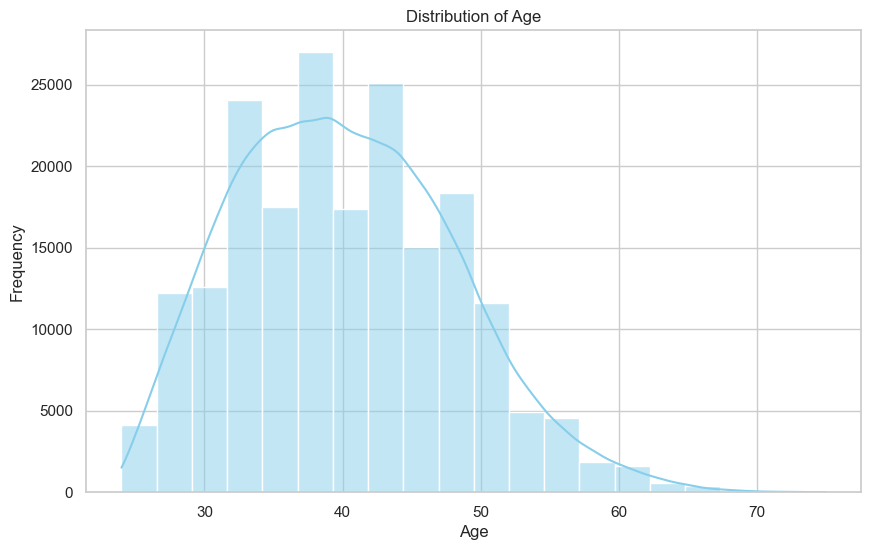

In [164]:
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=customers_df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Checking Features Effect**

**1. Relationship between PT service and Churn**

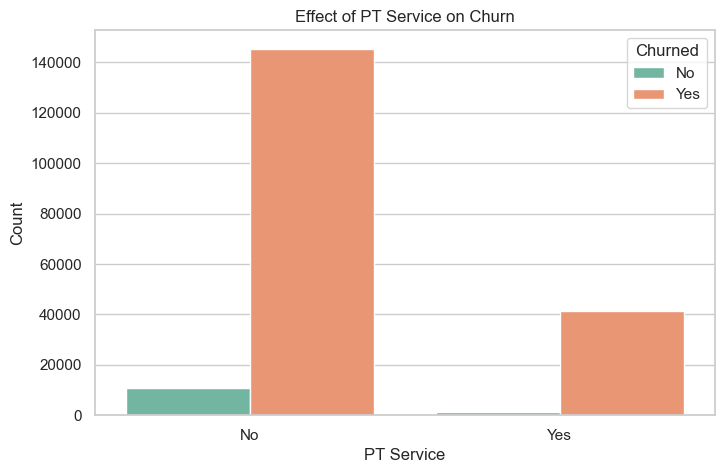

In [165]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='PT', hue='Churned', palette='Set2')
plt.title('Effect of PT Service on Churn')
plt.xlabel('PT Service')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

This shows that PT service **doesn't effet** Churn sigfinicantly.

**2. Relationship between Total Visits and Churn**

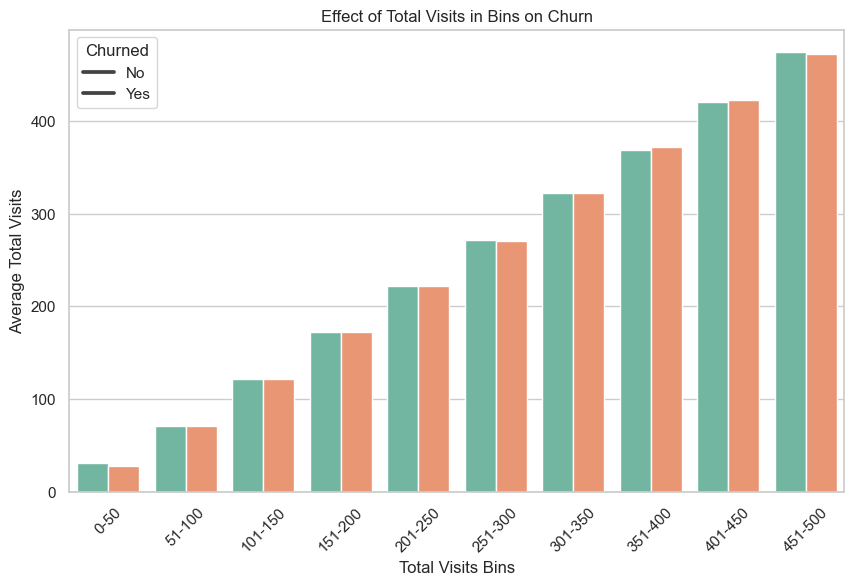

In [202]:
# Define the bins for total visits
total_visits_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Define the labels for the bins
total_visits_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Create a new column 'Total_Visits_Bins' containing the labels for the corresponding total visits bins
customers_df['Total_Visits_Bins'] = pd.cut(customers_df['total_visits'], bins=total_visits_bins, labels=total_visits_labels, right=False)

# Calculate the average total visits for each churn status and total visits bin
avg_total_visits = customers_df.groupby(['Churned', 'Total_Visits_Bins'])['total_visits'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_total_visits, x='Total_Visits_Bins', y='total_visits', hue='Churned', palette='Set2')
plt.title('Effect of Total Visits in Bins on Churn')
plt.xlabel('Total Visits Bins')
plt.ylabel('Average Total Visits')
plt.xticks(rotation=45)
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()


Shows that Visits also **doesn't effect** Churn

**3. Relationship between Gender and Churn**

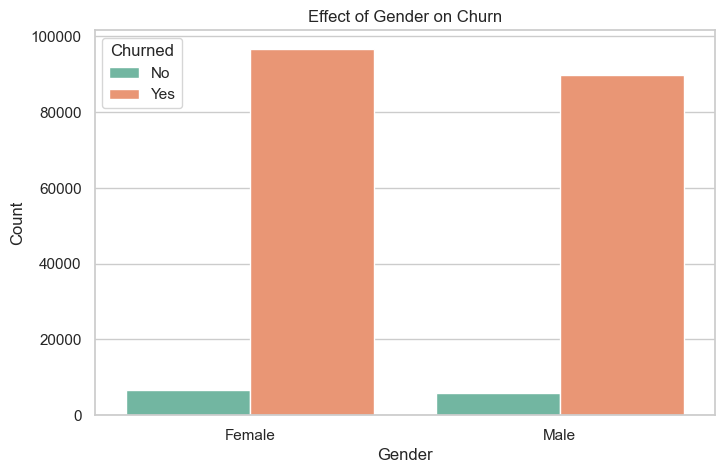

In [167]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Gender', hue='Churned', palette='Set2')
plt.title('Effect of Gender on Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

Shows that Gender also **doesn't effect** Churn

**4. Relationship between Usual_Time_Visit and Churn**

Text(0.5, 1.0, 'Total Visits Distribution by Churn Status')

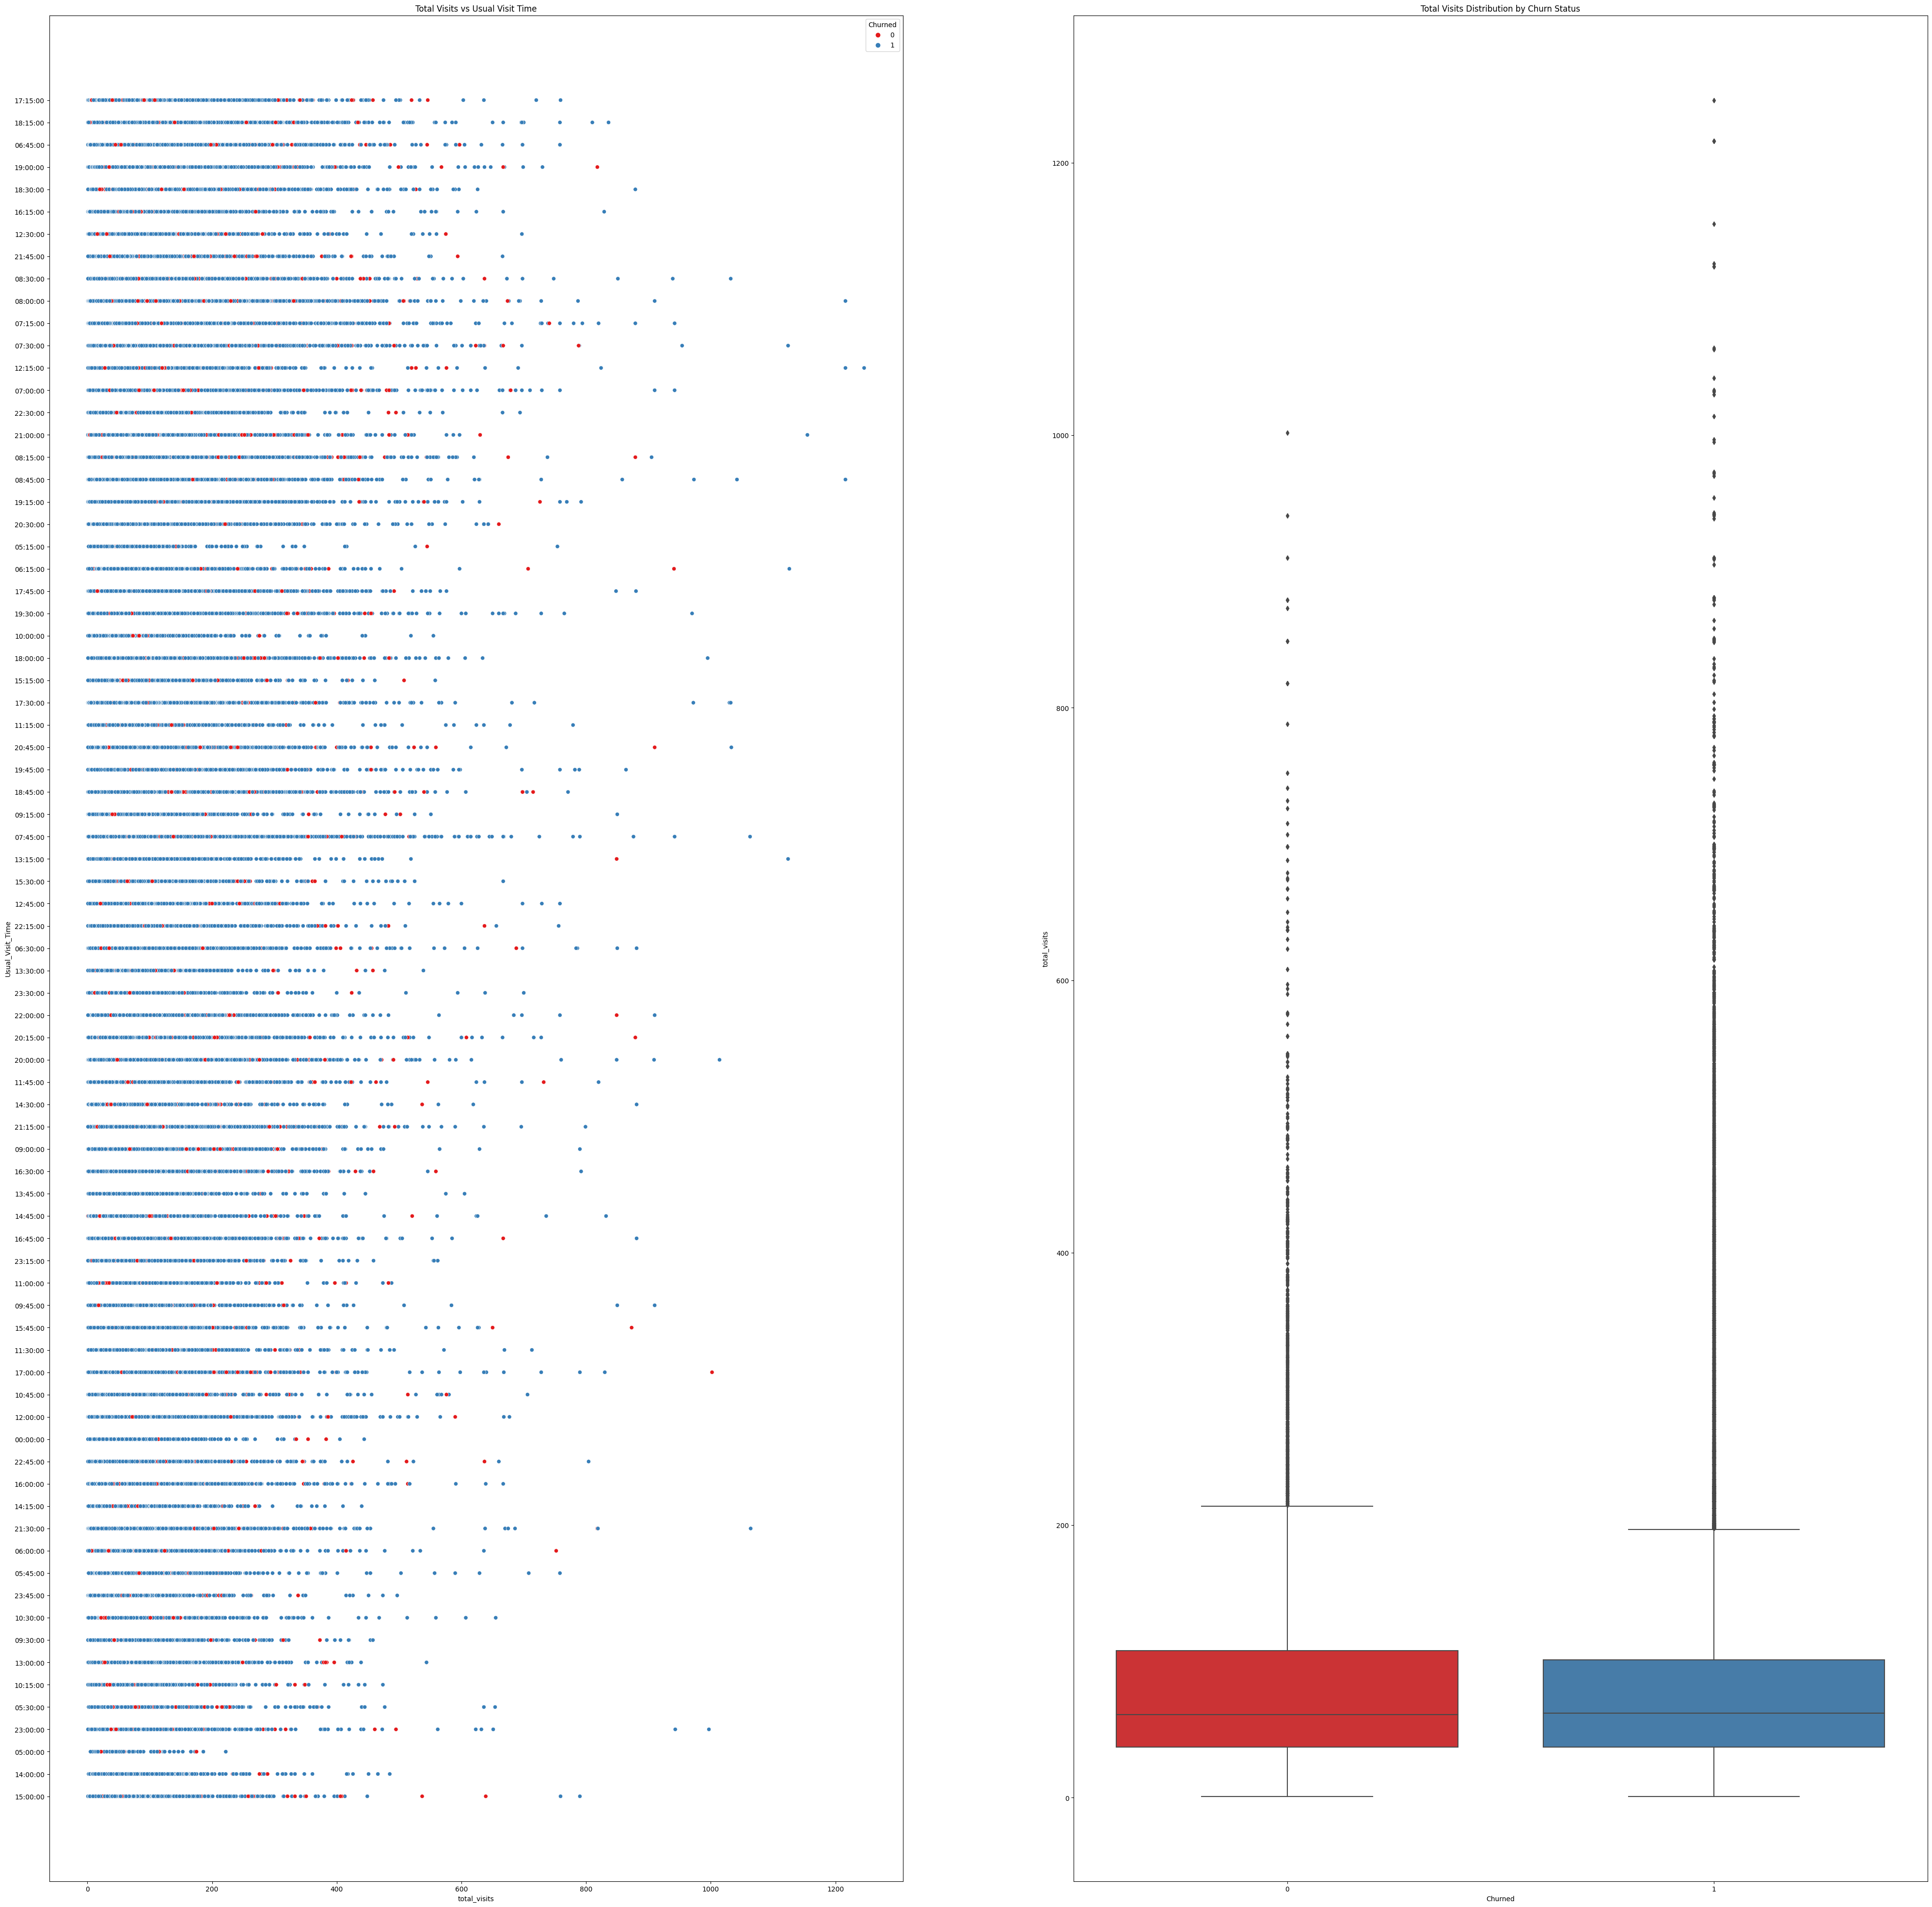

In [5]:
# Low Usage
plt.figure(figsize=(50, 50))
plt.subplot(1, 2, 1)
sns.scatterplot(data=customers_df, x='total_visits', y='Usual_Visit_Time', hue='Churned', palette='Set1')
plt.title('Total Visits vs Usual Visit Time')

plt.subplot(1, 2, 2)
sns.boxplot(data=customers_df, x='Churned', y='total_visits', palette='Set1')
plt.title('Total Visits Distribution by Churn Status')

In [192]:
time_df = customers_df.copy()

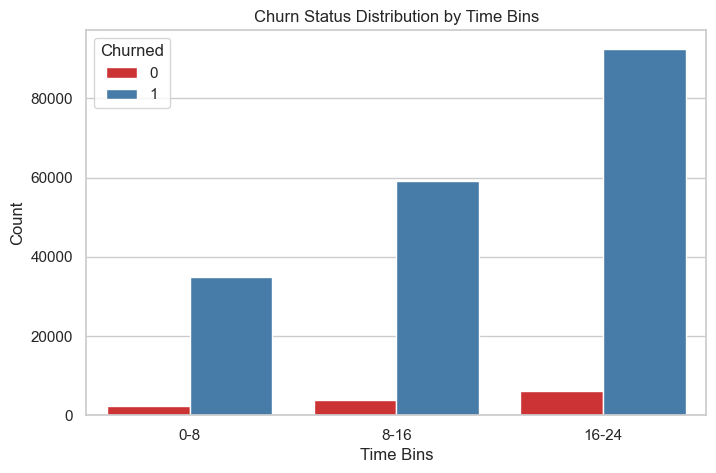

In [194]:
time_df['Usual_Visit_Time'] = pd.to_numeric(time_df['Usual_Visit_Time'].str.split(':').str[0])
time_bins = [0, 8, 16, 24]
time_labels = ['0-8', '8-16', '16-24']

time_df['Time_Bins'] = pd.cut(time_df['Usual_Visit_Time'], bins=time_bins, labels=time_labels, right=False)

plt.figure(figsize=(8, 5))
sns.countplot(data=time_df, x='Time_Bins', hue='Churned', palette='Set1')
plt.title('Churn Status Distribution by Time Bins')
plt.xlabel('Time Bins')
plt.ylabel('Count')
plt.show()


Shows that Usual_Visit_Time also **doesn't effect** Churn

**5. Relationship between End Year,Month and Churn**

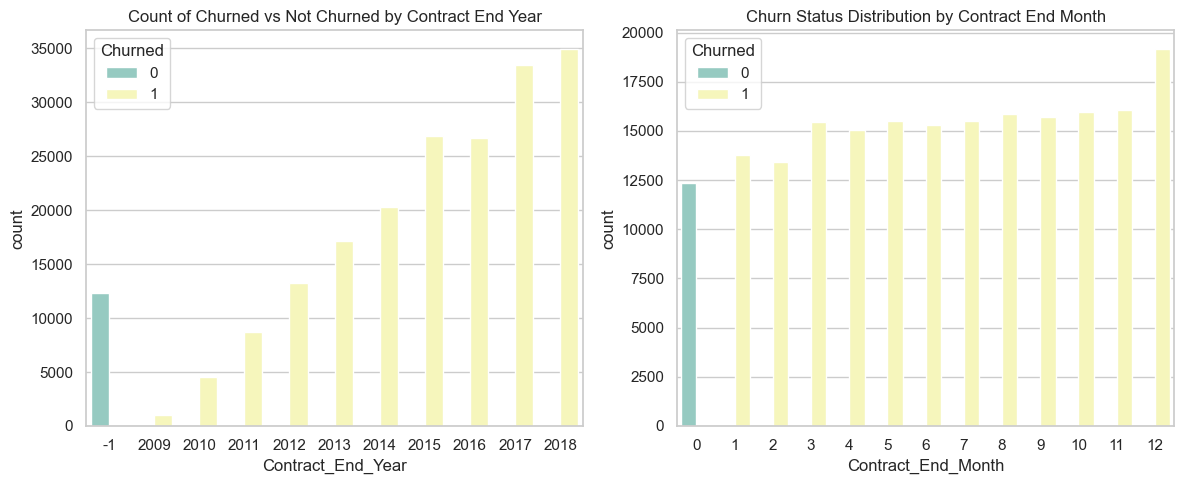

In [189]:
# Contractual Obligations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=customers_df, x='Contract_End_Year', hue='Churned', palette='Set3')
plt.title('Count of Churned vs Not Churned by Contract End Year')
plt.subplot(1, 2, 2)
sns.countplot(data=customers_df, x='Contract_End_Month', hue='Churned', palette='Set3')
plt.title('Churn Status Distribution by Contract End Month')

plt.tight_layout()
plt.show()

We can see that in **December the churn is significantly high**, proving hypothsis true!!

**6. Relationship between Price Start, End and Chrun**

Text(0.5, 1.0, 'Price End Distribution by Churn Status')

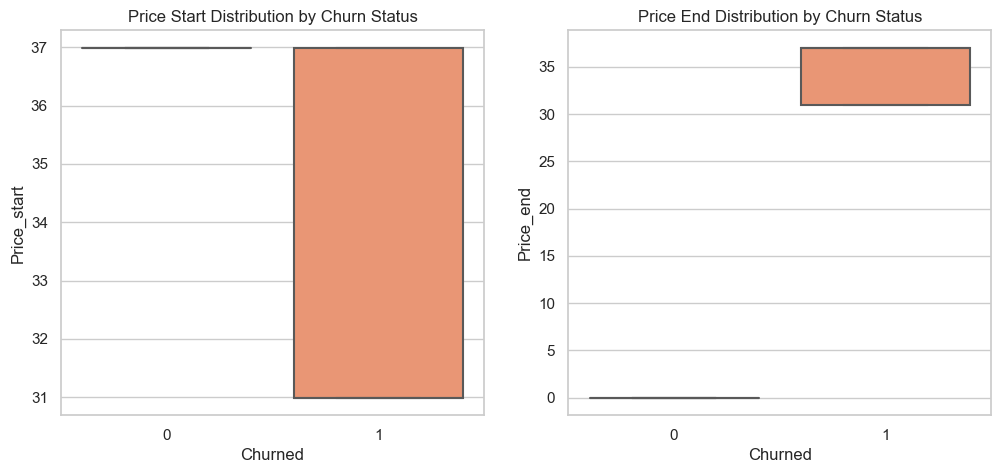

In [187]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=customers_df, x='Churned', y='Price_start', palette='Set2')
plt.title('Price Start Distribution by Churn Status')

plt.subplot(1, 2, 2)
sns.boxplot(data=customers_df, x='Churned', y='Price_end', palette='Set2')
plt.title('Price End Distribution by Churn Status')

No Significant **Effect**

**Conclusion on Churn**

**2. How effective is the company's PT service? Does the impact of the PT service differ among different customer segments?**

**1. Relation between Income Level and PT Service**

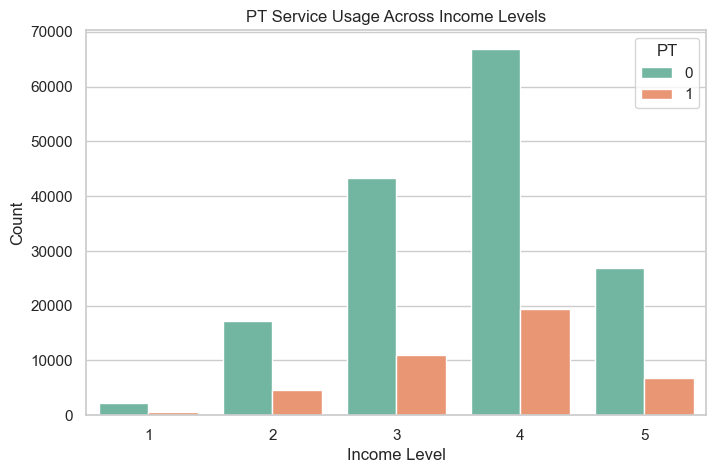

In [173]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Income Level', hue='PT', palette='Set2')
plt.title('PT Service Usage Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

In [176]:
# Percentage
income_pt_percentage = customers_df.groupby('Income Level')['PT'].mean() * 100
print("Percentage of Customers Using PT Service by Income Level:\n", income_pt_percentage)

Percentage of Customers Using PT Service by Income Level:
 Income Level
1    19.135802
2    21.425298
3    20.336521
4    22.531186
5    20.393624
Name: PT, dtype: float64


Trend of using PT service is **same** across all income levels

**2. Relation between Location and PT Service**

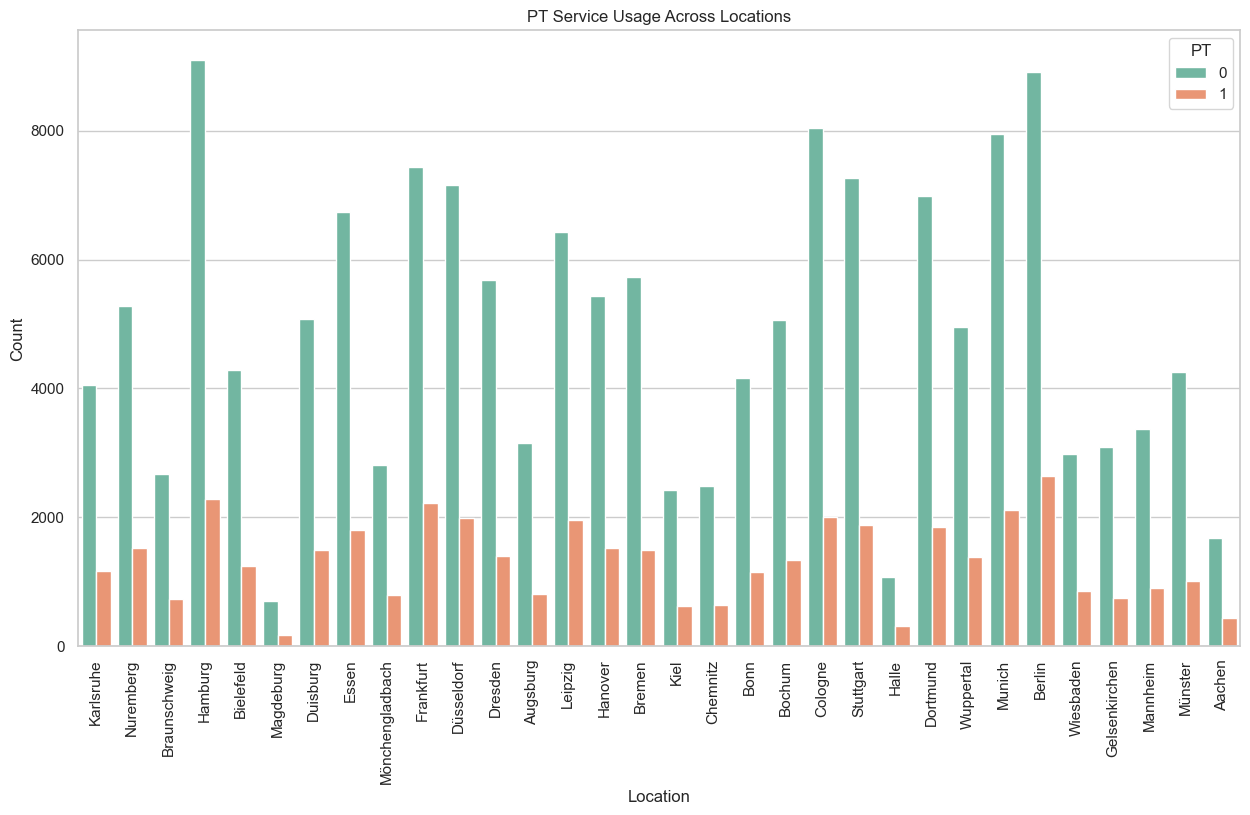

In [174]:
plt.figure(figsize=(15, 8))
sns.countplot(data=customers_df, x='Location', hue='PT', palette='Set2')
plt.title('PT Service Usage Across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [178]:
# Percentage
location_pt_percentage = customers_df.groupby('Location')['PT'].mean() * 100
print("Percentage of Customers Using PT Service by Location:\n", location_pt_percentage)

Percentage of Customers Using PT Service by Location:
 Location
Aachen             20.751174
Augsburg           20.468278
Berlin             22.931094
Bielefeld          22.573649
Bochum             20.901126
Bonn               21.706446
Braunschweig       21.378299
Bremen             20.714484
Chemnitz           20.453819
Cologne            19.916351
Dortmund           20.885718
Dresden            19.768754
Duisburg           22.723119
Düsseldorf         21.754808
Essen              21.186937
Frankfurt          23.060211
Gelsenkirchen      19.557292
Halle              22.855083
Hamburg            20.056224
Hanover            21.974705
Karlsruhe          22.277512
Kiel               20.655738
Leipzig            23.415912
Magdeburg          20.380739
Mannheim           21.277092
Munich             21.086611
Mönchengladbach    22.000554
Münster            19.271624
Nuremberg          22.375975
Stuttgart          20.629715
Wiesbaden          22.386895
Wuppertal          21.874016
Name: PT

Trend of using PT service is **same** across all cities

**3. Relation between Age-Group and PT Service**

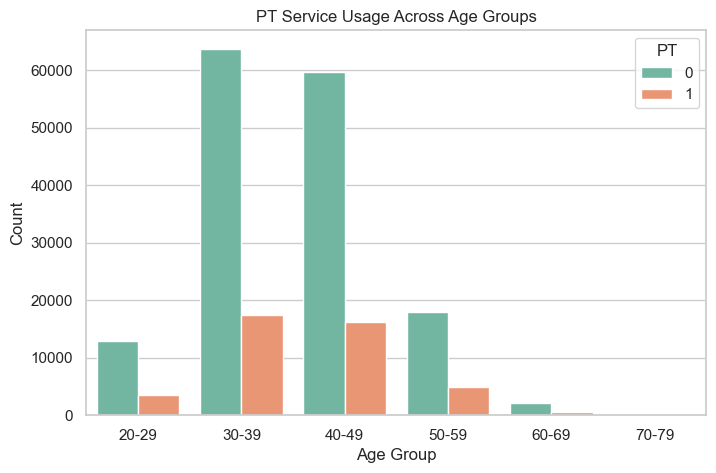

In [175]:
# Define age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
customers_df['Age_Group'] = pd.cut(customers_df['Age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Age_Group', hue='PT', palette='Set2')
plt.title('PT Service Usage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [179]:
# Percentage
age_group_pt_percentage = customers_df.groupby('Age_Group')['PT'].mean() * 100
print("Percentage of Customers Using PT Service by Age Group:\n", age_group_pt_percentage)

Percentage of Customers Using PT Service by Age Group:
 Age_Group
20-29    21.068394
30-39    21.469149
40-49    21.359313
50-59    21.486775
60-69    21.760484
70-79    27.659574
Name: PT, dtype: float64


Trend of using PT service is **same** across all age gropus

**4. Relation between Total_Visits and PT Service**

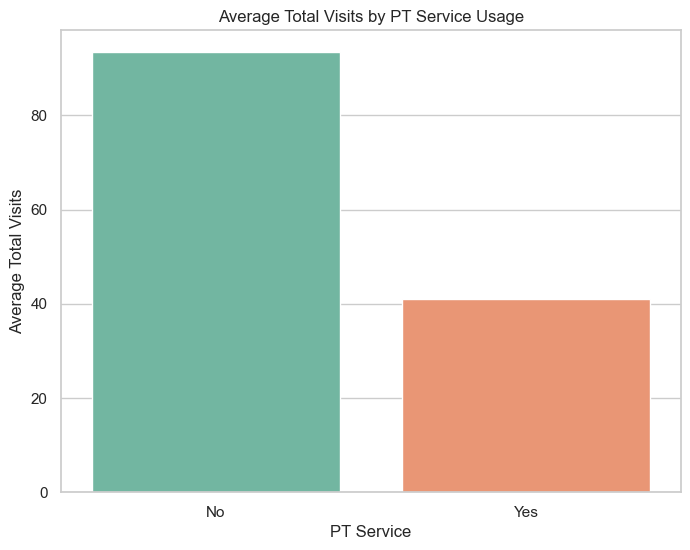

In [185]:
visits_by_pt = customers_df.groupby('PT')['total_visits'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=visits_by_pt, x='PT', y='total_visits', palette='Set2')
plt.title('Average Total Visits by PT Service Usage')
plt.xlabel('PT Service')
plt.ylabel('Average Total Visits')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Those **who visits more**, they will **no longer take PT service**

**Conclusion about PT service**

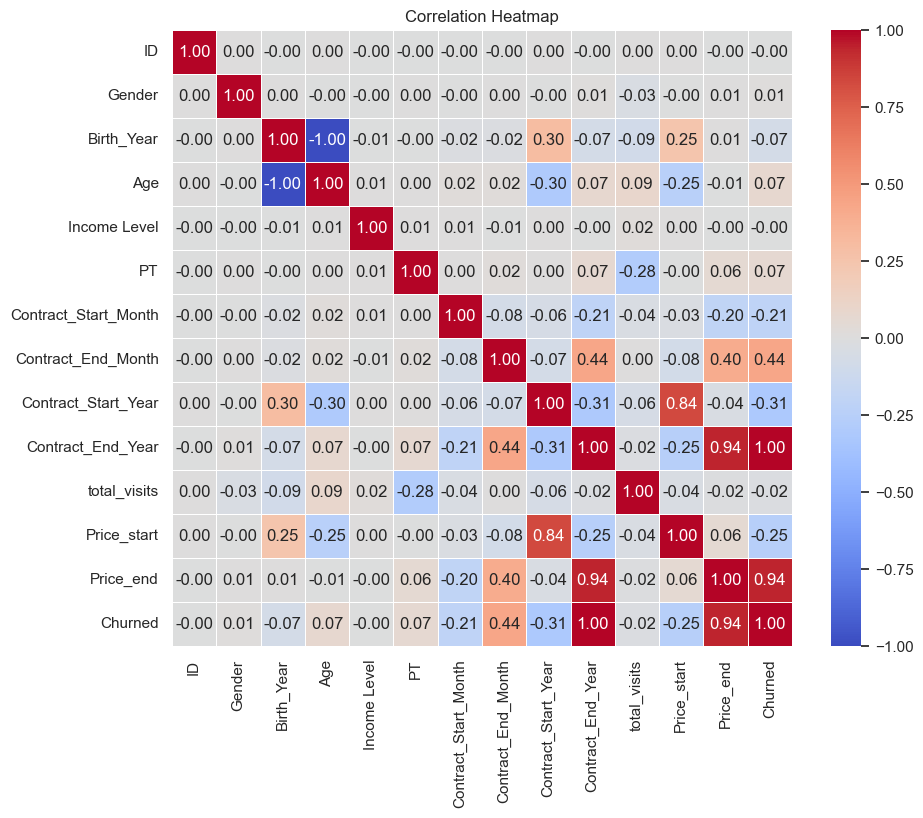

In [180]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(customers_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## QUESTION 2 -Modeling

**Create a model to predict customer churn. Use the following questions to guide you:**

**Do you need to perform any feature engineering before proceeding?**

At this step all required feature pre-processing is done.
like encoding features using label encoder due to the fact of classification

In [2]:
customers_df = pd.read_csv('Project.csv')

In [3]:
customers_df

,ID,Gender,Birth_Year,Age,Location,Income Level,Contract_Start,Contract_End,PT,Usual_Visit_Time,Contract_Start_Month,Contract_End_Month,Contract_Start_Year,Contract_End_Year,total_visits,Price_start,Price_end,Churned,Age_Group,Total_Visits_Bins
0,199842,1,1993,31,Karlsruhe,3,Nov-15,Apr-16,0,17:15:00,11,4,2015,2016,96,30.99,36.99,1,30-39,51-100
1,85660,1,1980,44,Nuremberg,3,Apr-14,Jul-14,1,18:15:00,4,7,2014,2014,78,30.99,30.99,1,40-49,51-100
2,49802,1,1969,55,Braunschweig,5,Jun-18,Sep-18,0,06:45:00,6,9,2018,2018,56,36.99,36.99,1,50-59,51-100
3,68602,1,1981,43,Hamburg,5,Apr-13,Jul-13,0,19:00:00,4,7,2013,2013,89,30.99,30.99,1,40-49,51-100
4,4924,1,1981,43,Bielefeld,2,Dec-15,Mar-16,0,18:15:00,12,3,2015,2016,29,30.99,36.99,1,40-49,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199054,8199,0,1978,46,Essen,3,Jun-12,Nov-12,0,16:30:00,6,11,2012,2012,94,30.99,30.99,1,40-49,51-100
199055,5365,1,1982,42,Cologne,5,Oct-09,Oct-09,1,12:00:00,10,10,2009,2009,16,30.99,30.99,1,40-49,0-50
199056,26122,0,1977,47,Dresden,5,Oct-14,Dec-14,0,07:00:00,10,12,2014,2014,25,30.99,30.99,1,40-49,0-50
199057,55944,0,1993,31,Hanover,3,Nov-14,Jun-15,0,20:15:00,11,6,2014,2015,95,30.99,30.99,1,30-39,51-100


In [211]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199059 entries, 0 to 199058
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    199059 non-null  int32   
 1   Gender                199059 non-null  int64   
 2   Birth_Year            199059 non-null  int64   
 3   Age                   199059 non-null  int64   
 4   Location              199059 non-null  object  
 5   Income Level          199059 non-null  int64   
 6   Contract_Start        199059 non-null  object  
 7   Contract_End          186711 non-null  object  
 8   PT                    199059 non-null  int64   
 9   Usual_Visit_Time      199059 non-null  object  
 10  Contract_Start_Month  199059 non-null  int64   
 11  Contract_End_Month    199059 non-null  Int64   
 12  Contract_Start_Year   199059 non-null  int64   
 13  Contract_End_Year     199059 non-null  int32   
 14  total_visits          199059 non-nul

This is the list of potential features!!
**1. Gender** : It does not directly effect the churn, but have indirect relation
**2. Age** : From the above analysis, there is also no direct relation between age and churn
**3. Income Level** A bit of correlation is found
**4. PT** A bit of correlation is found
**5. total_visits**
**6. Price_start** Impacts alot!! with correlation of -0.25


In [4]:
# Feature selection
features = ['Gender', 'Age', 'Income Level', 'PT', 'total_visits', 'Price_start']#,'Contract_End_Month']
X = customers_df[features]
y = customers_df['Churned']

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**What kind of Machine Learning algorithm should you use?**

Ensambleing models are found to be great in term of finding hidden/indirect relation between features
and also there are useful in-term of imbalance datasets

In [16]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

In [17]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
}

**Which evaluation metric will you use to assess model performance? How reliable are your results?**

In [18]:
# Train and evaluate each model
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluation
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Feature importance (if applicable)
    if hasattr(clf, 'feature_importances_'):
        feature_importance = clf.feature_importances_
        print(f"Feature Importance for {name}: {feature_importance}")
    
    # Print evaluation metrics
    print(f"Metrics for {name}:")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Confusion Matrix:")
    print(confusion)
    print("\n")

Training Random Forest...
Feature Importance for Random Forest: [0.00691895 0.26073381 0.03305212 0.00982758 0.59415829 0.09530924]
Metrics for Random Forest:
F1 Score: 0.9573227704009791
Recall: 0.9741550163372436
Precision: 0.9410623269773097
Confusion Matrix:
[[  196  2278]
 [  965 36373]]


Training XGBoost...
Feature Importance for XGBoost: [0.00219157 0.00247061 0.00236178 0.0192181  0.00317802 0.9705799 ]
Metrics for XGBoost:
F1 Score: 0.9678247675368634
Recall: 0.9993572232042424
Precision: 0.9382213170400543
Confusion Matrix:
[[   17  2457]
 [   24 37314]]




**Confusion Matrix** will be reliable for this task, focusing on **Precision**
so that we can say precisily how many people are going to leave instead saying these much people may leave with out accuracy

The results show that both Random Forest and XGBoost models have performed well in terms of F1-score, recall, and precision. However, it's essential to note that the XGBoost model has higher recall but slightly lower precision compared to the Random Forest model.

The results can be improved if we consider other features as well such that:
--> Additional factors to consider that aren't listed:

1.  Lack of desired amenities or equipment
2.  Inconvenient gym hours
3.  Unsanitary or overcrowded facilities
4.  Intimidating atmosphere
5.  Health issues that prevent gym use
6.  Finding alternative workout options (e.g., home workouts, online fitness classes)